# ``regionprops_3D``
This is similar to the ``regionprops`` in ``scikit-image`` but has some extra features that are relevant to 3D images.  Note that the ``scikit-image`` version has been adding 3D capabilities, make the PoreSpy version less useful.

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as spim

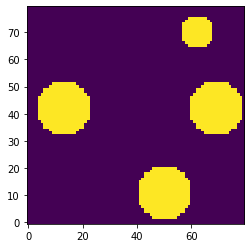

In [2]:
im = ps.generators.rsa([80, 80, 80], r=10, clearance=3)
plt.imshow(im[20, ...], origin='lower', interpolation='none');

We need to label each sphere so they are recognized as individual regions:

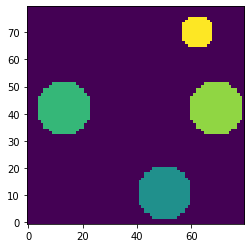

In [3]:
regions = spim.label(im)[0]
plt.imshow(regions[20, ...], origin='lower', interpolation='none');

In [4]:
props = ps.metrics.regionprops_3D(regions)

``props`` is a list of ``RegionProperties`` objects, subclassed from ``scikit-image``.  Each ``RegionProperties`` object possess the properties as attributes.  Note that these are calculated on demand, so the ``regionsprops_3D`` function appears very quick, but the work has not yet been done.

In [5]:
props

The properties of regions 1 are on the ``RegionsProperties`` object located at position 0 in the ``props`` list:

In [6]:
for d in dir(props[0]):
    if not d.startswith('_'):
        print(d)

area
area_bbox
area_convex
area_filled
axis_major_length
axis_minor_length
bbox
bbox_volume
border
centroid
centroid_local
centroid_weighted
centroid_weighted_local
convex_volume
coords
dt
eccentricity
equivalent_diameter_area
euler_number
extent
feret_diameter_max
image
image_convex
image_filled
image_intensity
inertia_tensor
inertia_tensor_eigvals
inscribed_sphere
intensity_max
intensity_mean
intensity_min
label
mask
moments
moments_central
moments_hu
moments_normalized
moments_weighted
moments_weighted_central
moments_weighted_hu
moments_weighted_normalized
orientation
perimeter
perimeter_crofton
skeleton
slice
slices
solidity
sphericity
surface_area
surface_mesh_simplices
surface_mesh_vertices
volume


Let's check a few of the properties:

In [7]:
print(props[0].volume)

4139


Because the present function is meant for 3D images, we have added specific terminology, like volume, instead of allowing area to mean volume like the ``scikit-image`` version"

In [8]:
print(props[0].area)

4139


We do have a ``surface_area``, which is also specific to 3D objects:

In [9]:
print(props[0].surface_area)

1165.306396484375


In addition to scalar metrics, we also provide access to useful images of the region:

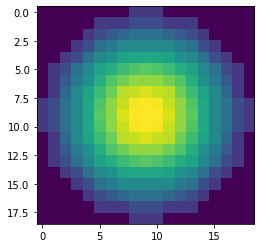

In [10]:
plt.imshow(props[0].dt[5, ...]);